Archivo CSV cargado exitosamente.

--- Promedio de Nodos Evaluados por Fase del Juego ---
    algorithm  pieces_on_board  nodes_evaluated
0  Alpha-Beta                0          12022.0
1  Alpha-Beta                2            864.7
2  Alpha-Beta                4             92.8
3  Alpha-Beta                6             11.2
4  Alpha-Beta                8              1.0
5     Minimax                0         549945.0
6     Minimax                2           6987.4
7     Minimax                4            218.2
8     Minimax                6             12.3
9     Minimax                8              1.0

Gráfico guardado exitosamente como 'rendimiento_algoritmos.png


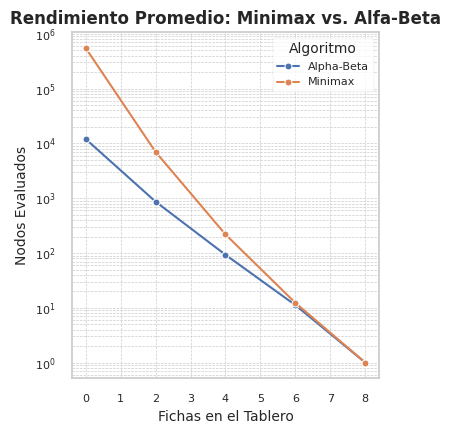

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Configuración de Estilo y Carga de Datos ---
sns.set_theme(style="whitegrid") 

try:
    df = pd.read_csv("full_simulation_results.csv")
    print("Archivo CSV cargado exitosamente.")
except FileNotFoundError:
    print("Error: No se encontró 'full_simulation_results.csv'. Ejecuta 'make simulate' primero.")
    df = pd.DataFrame()

if not df.empty:
    df_profiles = df[
        (df['experiment_batch'] == 'Minimax_Profile') |
        (df['experiment_batch'] == 'AlphaBeta_Profile')
    ].copy()
    df_ai_turns = df_profiles[df_profiles['algorithm'] != 'Random'].copy()
    df_ai_turns['nodes_evaluated'] = pd.to_numeric(df_ai_turns['nodes_evaluated'])
    df_ai_turns['pieces_on_board'] = pd.to_numeric(df_ai_turns['pieces_on_board'])

    avg_nodes_by_complexity = df_ai_turns.groupby(['algorithm', 'pieces_on_board'])['nodes_evaluated'].mean().reset_index()
    print("\n--- Promedio de Nodos Evaluados por Fase del Juego ---")
    print(avg_nodes_by_complexity)

    FIG_SIZE = (4, 4.5) 
    TITLE_FONT_SIZE = 12
    LABEL_FONT_SIZE = 10
    TICK_FONT_SIZE = 8
    LEGEND_FONT_SIZE = 8

    plt.style.use('seaborn-v0_8-paper') 
    fig, ax = plt.subplots(figsize=FIG_SIZE)

    sns.lineplot(
        data=avg_nodes_by_complexity,
        x='pieces_on_board',
        y='nodes_evaluated',
        hue='algorithm',
        marker='o',
        markersize=5, 
        linewidth=1.5, 
        ax=ax
    )

    ax.set_yscale('log')

    ax.set_title(
        'Rendimiento Promedio: Minimax vs. Alfa-Beta',
        fontsize=TITLE_FONT_SIZE,
        fontweight='bold'
    )
    ax.set_xlabel('Fichas en el Tablero', fontsize=LABEL_FONT_SIZE)
    ax.set_ylabel('Nodos Evaluados', fontsize=LABEL_FONT_SIZE)

    ax.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE)

    ax.legend(title='Algoritmo', fontsize=LEGEND_FONT_SIZE, title_fontsize=LABEL_FONT_SIZE)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.tight_layout()
    output_filename = 'rendimiento_algoritmos.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    
    print(f"\nGráfico guardado exitosamente como '{output_filename}")

    plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-paper')

FIG_SIZE = (4, 4.5) 
TITLE_FONT_SIZE = 12
LABEL_FONT_SIZE = 10
TICK_FONT_SIZE = 8
LEGEND_FONT_SIZE = 8

try:
    df = pd.read_csv("full_simulation_results.csv")
    print("Archivo CSV cargado exitosamente.")
    print(f"Total de registros: {len(df)}")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'full_simulation_results.csv'. Ejecuta 'make simulate' primero.")
    df = pd.DataFrame()

# Verificar que el dataframe se haya cargado antes de proceder
if not df.empty:
    print("\nPrevisualización de los datos:")
    print(df.head())

Archivo CSV cargado exitosamente.
Total de registros: 230

Previsualización de los datos:
   turn  pieces_on_board   algorithm  nodes_evaluated  time_seconds  winner  \
0     1                0     Minimax           549945     29.360041       0   
1     2                1  Alpha-Beta             2315      0.125012       0   
2     3                2     Minimax             6811      0.361142       0   
3     4                3  Alpha-Beta              278      0.015663       0   
4     5                4     Minimax              185      0.009508       0   

    experiment_batch        simulation_id  
0  Direct_Comparison  Direct_Comparison_1  
1  Direct_Comparison  Direct_Comparison_1  
2  Direct_Comparison  Direct_Comparison_1  
3  Direct_Comparison  Direct_Comparison_1  
4  Direct_Comparison  Direct_Comparison_1  



--- Análisis 2: Rendimiento Promedio vs. Oponente Aleatorio ---

Promedio de Nodos Evaluados por Fase del Juego:
    algorithm  pieces_on_board  nodes_evaluated
0  Alpha-Beta                0          12022.0
1  Alpha-Beta                2            864.7
2  Alpha-Beta                4             92.8
3  Alpha-Beta                6             11.2
4  Alpha-Beta                8              1.0
5     Minimax                0         549945.0
6     Minimax                2           6987.4
7     Minimax                4            218.2
8     Minimax                6             12.3
9     Minimax                8              1.0

Gráfico 'rendimiento_promedio.png' guardado exitosamente.


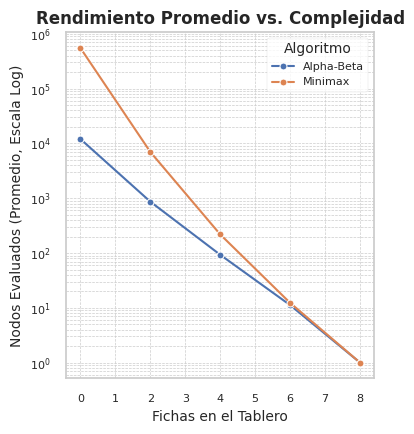

In [5]:
if not df.empty:
    print("\n--- Análisis 2: Rendimiento Promedio vs. Oponente Aleatorio ---")
    
    # Filtrar y preparar datos
    df_profiles = df[(df['experiment_batch'] == 'Minimax_Profile') | (df['experiment_batch'] == 'AlphaBeta_Profile')].copy()
    df_ai_turns = df_profiles[df_profiles['algorithm'] != 'Random'].copy()
    
    # Calcular el promedio de nodos agrupando por algoritmo y complejidad
    avg_nodes_by_complexity = df_ai_turns.groupby(['algorithm', 'pieces_on_board'])['nodes_evaluated'].mean().reset_index()

    print("\nPromedio de Nodos Evaluados por Fase del Juego:")
    print(avg_nodes_by_complexity)

    # Generar el gráfico de líneas
    fig2, ax2 = plt.subplots(figsize=FIG_SIZE)

    sns.lineplot(
        data=avg_nodes_by_complexity,
        x='pieces_on_board',
        y='nodes_evaluated',
        hue='algorithm',
        marker='o',
        markersize=5,
        linewidth=1.5,
        ax=ax2
    )

    ax2.set_yscale('log')
    ax2.set_title('Rendimiento Promedio vs. Complejidad', fontsize=TITLE_FONT_SIZE, fontweight='bold')
    ax2.set_xlabel('Fichas en el Tablero', fontsize=LABEL_FONT_SIZE)
    ax2.set_ylabel('Nodos Evaluados (Promedio, Escala Log)', fontsize=LABEL_FONT_SIZE)
    ax2.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE)
    ax2.legend(title='Algoritmo', fontsize=LEGEND_FONT_SIZE, title_fontsize=LABEL_FONT_SIZE)
    ax2.grid(True, which="both", linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.savefig('grafico_rendimiento_promedio.png', dpi=300, bbox_inches='tight')
    print("\nGráfico 'rendimiento_promedio.png' guardado exitosamente.")
    plt.show()

In [6]:
if not df.empty:
    print("\n--- Análisis FInal---")
    
    # Usamos los mismos datos filtrados del análisis 2
    df_profiles = df[(df['experiment_batch'] == 'Minimax_Profile') | (df['experiment_batch'] == 'AlphaBeta_Profile')].copy()
    df_ai_turns = df_profiles[df_profiles['algorithm'] != 'Random'].copy()

    # Calcular la suma total de nodos para cada algoritmo
    total_nodes = df_ai_turns.groupby('algorithm')['nodes_evaluated'].sum()
    total_minimax = total_nodes.get('Minimax', 0)
    total_alpha_beta = total_nodes.get('Alpha-Beta', 0)
    
    # Calcular el porcentaje de reducción
    if total_minimax > 0:
        reduction_percentage = (1 - (total_alpha_beta / total_minimax)) * 100
    else:
        reduction_percentage = 0

    print("\n" + "="*50)
    print("Tabla Resumen: Eficiencia Agregada Total")
    print("="*50)
    print(f"{'Algoritmo':<15} | {'Nodos Totales Evaluados':>30}")
    print("-"*50)
    print(f"{'Minimax':<15} | {int(total_minimax):>30,}")
    print(f"{'Alfa-Beta':<15} | {int(total_alpha_beta):>30,}")
    print("="*50)
    print(f"Reducción de Nodos con Alfa-Beta: {reduction_percentage:.2f}%")
    print("="*50)


--- Análisis 3: Veredicto Final (Mejora Agregada) ---

Tabla Resumen: Eficiencia Agregada Total
Algoritmo       |        Nodos Totales Evaluados
--------------------------------------------------
Minimax         |                      5,571,636
Alfa-Beta       |                        129,910
Reducción de Nodos con Alfa-Beta: 97.67%
